# Minnesota BMSB Analysis: `Exploratory Spatial Data Analysis`
##### Contributors: *Luke Zaruba*, *Mattie Gisselbeck*
##### Last Updated: 2023-04-20

In this notebook, exploratory spatial data analysis is performed to gain insights into BMSB habitat characteristics. This can be used to inform decision making, regarding modeling and analysis.

In [1]:
# Import Packages
import os

import arcgis
import pandas as pd

### Preparation

In [2]:
# Path to FC with Aggregated Data
full_gdb_path = r"C:\gitFiles\minnesota-bmsb-analysis\data\gdb\bmsb_analysis.gdb"

# Convert to SEDF
df = pd.DataFrame.spatial.from_featureclass(os.path.join(full_gdb_path, "cities_attributed"))

# Change Column Names
df.columns = ['OBJECTID', 'GNIS', 'City',
       'County', 'Population', 'Shape Length',
       'Elevation: Range', 'Elevation: Mean', 'Elevation: StDev',
       'Elevation: Median', 'Weather: Join Count',
       'Weather: Mean Max Temp', 'Weather: Mean Min Temp', 'Weather: Mean Precip',
       'Observations: Count', 'LC: Urban',
       'LC: Ag', 'LC: Natural', 'SHAPE'
]

In [3]:
# Convert LC to Percentages
df["LC: Urban %"] = df["LC: Urban"] / (df["LC: Urban"] + df["LC: Ag"] + df["LC: Natural"])
df["LC: Ag %"] = df["LC: Ag"] / (df["LC: Urban"] + df["LC: Ag"] + df["LC: Natural"])
df["LC: Natural %"] = df["LC: Natural"] / (df["LC: Urban"] + df["LC: Ag"] + df["LC: Natural"])

In [4]:
# Convert Observation Count to Presence
df["Observations: Presence"] = df["Observations: Count"].apply(lambda x: 1 if x >= 1 else 0)

In [5]:
# Drop Columns
df = df.drop(['Shape Length', 'County', 'GNIS', 'Weather: Join Count', 'LC: Urban', 'LC: Ag', 'LC: Natural', 'Observations: Count'], axis=1)

### Data Summary

In [6]:
# Display DF
df.head()

,OBJECTID,City,Population,Elevation: Range,Elevation: Mean,Elevation: StDev,Elevation: Median,Weather: Mean Max Temp,Weather: Mean Min Temp,Weather: Mean Precip,SHAPE,LC: Urban %,LC: Ag %,LC: Natural %,Observations: Presence
0,1,Bluffton,208,84,1347.493968,21.954257,1353,69.002294,49.479673,0.000164,"{""rings"": [[[329659.49899999984, 5147112.93899...",0.100864,0.552591,0.346545,0
1,2,Sartell,17412,120,1047.756071,16.313259,1047,69.840329,50.023607,0.000492,"{""rings"": [[[401466.0499999998, 5050916.149], ...",0.638142,0.232129,0.129729,0
2,3,Cambridge,9862,85,949.380606,17.984951,955,70.462952,49.659673,0.000273,"{""rings"": [[[479383.5999999996, 5046640.25], [...",0.566136,0.177083,0.256781,1
3,4,Waseca,9221,56,1136.962191,12.658397,1135,72.184263,52.943936,0.000383,"{""rings"": [[[456193.8666000003, 4880132.7445],...",0.594486,0.116623,0.288890,0
4,5,La Crescent,5272,584,725.382273,128.798479,679,74.276315,58.962108,0.000000,"{""rings"": [[[633758.4579999996, 4853600.790999...",0.509410,0.048732,0.441858,0


In [7]:
# Get DF Info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 903 entries, 0 to 902
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype   
---  ------                  --------------  -----   
 0   OBJECTID                903 non-null    int64   
 1   City                    903 non-null    object  
 2   Population              903 non-null    int64   
 3   Elevation: Range        903 non-null    int64   
 4   Elevation: Mean         903 non-null    float64 
 5   Elevation: StDev        903 non-null    float64 
 6   Elevation: Median       903 non-null    int64   
 7   Weather: Mean Max Temp  903 non-null    float64 
 8   Weather: Mean Min Temp  903 non-null    float64 
 9   Weather: Mean Precip    903 non-null    float64 
 10  SHAPE                   903 non-null    geometry
 11  LC: Urban %             903 non-null    float64 
 12  LC: Ag %                903 non-null    float64 
 13  LC: Natural %           903 non-null    float64 
 14  Observations: Presence  90

In [8]:
# Describe Columns of Interest
columns = ["Elevation: Range", "Elevation: Mean", "Elevation: StDev", "Elevation: Median", "Weather: Mean Max Temp", "Weather: Mean Min Temp", "Weather: Mean Precip", "LC: Urban %", "LC: Ag %", "LC: Natural %"]

df[columns].describe()

,Elevation: Range,Elevation: Mean,Elevation: StDev,Elevation: Median,Weather: Mean Max Temp,Weather: Mean Min Temp,Weather: Mean Precip,LC: Urban %,LC: Ag %,LC: Natural %
count,903.000000,903.000000,903.000000,903.000000,903.000000,903.000000,903.000000,903.000000,903.000000,903.000000
mean,114.218162,1127.632461,24.186510,1126.386489,71.089364,51.272114,0.000201,0.430230,0.312486,0.257284
std,120.423155,213.170434,30.279116,214.834155,3.825282,3.735759,0.000211,0.231800,0.227503,0.239348
min,2.000000,688.944369,0.481641,659.000000,56.646569,39.016999,0.000000,0.031836,0.000000,0.000000
25%,39.000000,960.271353,7.434392,961.000000,69.002294,49.412634,0.000000,0.230923,0.131997,0.069746
50%,70.000000,1098.637451,13.610554,1099.000000,71.817379,51.805901,0.000164,0.413649,0.285793,0.180556
75%,136.500000,1276.062355,27.667696,1279.000000,73.463934,54.187372,0.000328,0.597262,0.479561,0.382105
max,942.000000,1827.998921,302.245532,1821.000000,79.324885,60.390536,0.000777,1.000000,0.927194,0.967755


In [9]:
# Describe Columns of Interest - Split by Presence
df[columns].groupby(df["Observations: Presence"]).describe().T

Observations: Presence           0           1
Elevation: Range count  797.000000  106.000000
                 mean   102.687578  200.915094
                 std    114.182572  130.926742
                 min      2.000000   14.000000
                 25%     35.000000  114.000000
...                            ...         ...
LC: Natural %    min      0.000000    0.007946
                 25%      0.063830    0.101847
                 50%      0.177788    0.193961
                 75%      0.387164    0.322746
                 max      0.967755    0.794646

[80 rows x 2 columns]

### Visualization

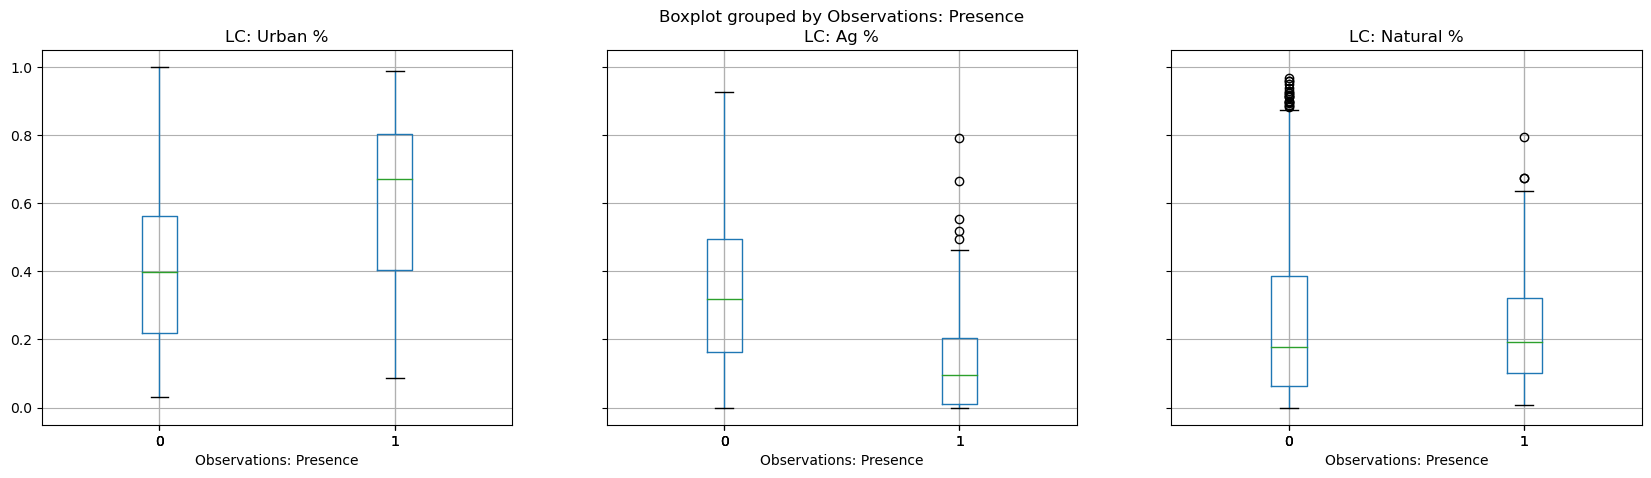

In [10]:
# Landcover
lc_box = df.boxplot(column=["LC: Urban %", "LC: Ag %", "LC: Natural %"], by="Observations: Presence", figsize=(20, 5), layout=(1, 3))

lc_box;

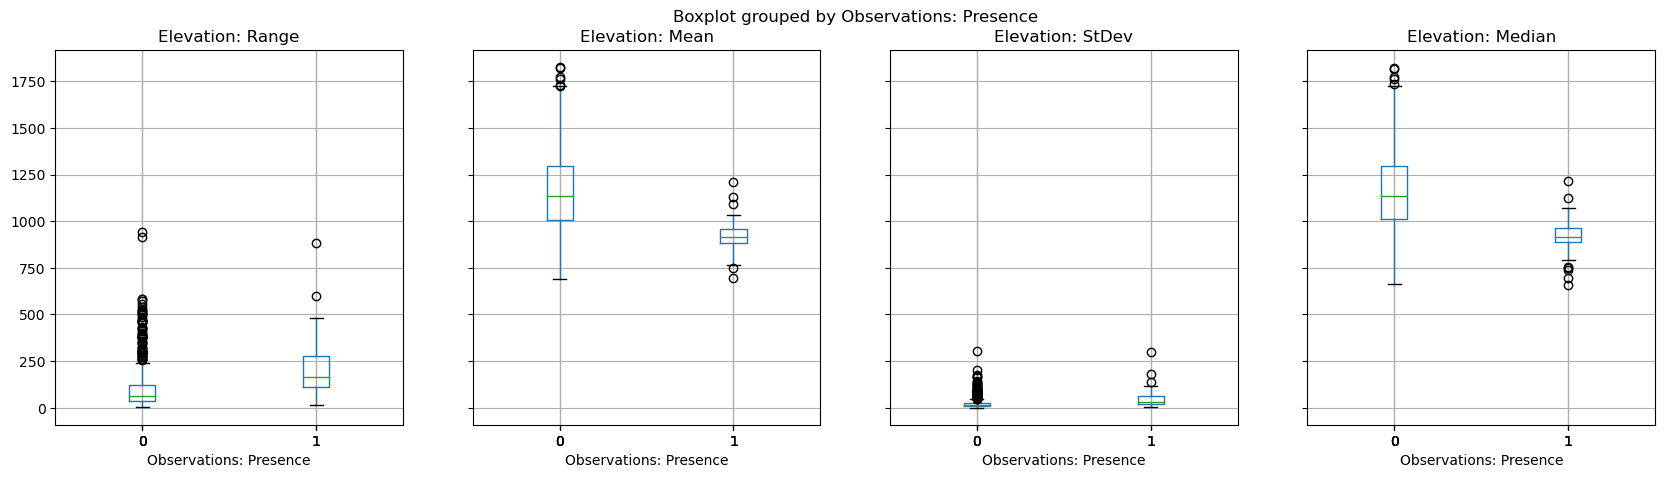

In [11]:
# Elevation
elev_box = df.boxplot(column=["Elevation: Range", "Elevation: Mean", "Elevation: StDev", "Elevation: Median"], by="Observations: Presence", figsize=(20, 5), layout=(1, 4))

elev_box;

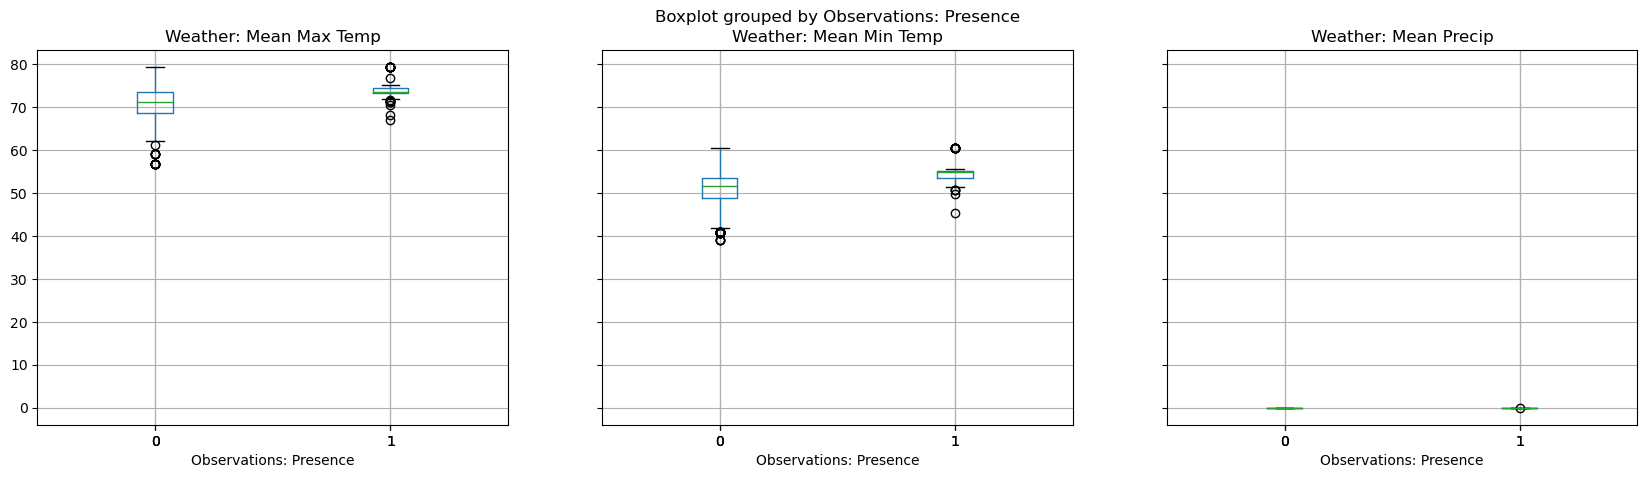

In [12]:
# Weather
wx_box = df.boxplot(column=["Weather: Mean Max Temp", "Weather: Mean Min Temp", "Weather: Mean Precip"], by="Observations: Presence", figsize=(20, 5), layout=(1, 3))

wx_box;